In [9]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib as mlt
import matplotlib.pyplot as plt

# 1. KNN 알고리즘 (K-Nearest Neighbors)

#### 원리

1. Train Data를 저장한다.
2. Test와 Train을 비교하여 가장 가까운 데이터 포인트를 찾는다.

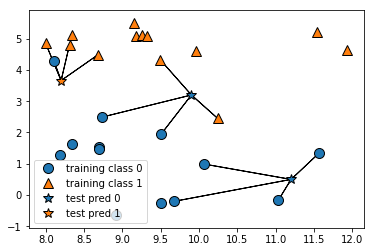

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

- Train 데이터 내 클래스 [0, 1], 혹은 [세모, 동그라미]를 기반으로 
- Test 데이터와 가장 가까운 데이터를 찾아 분류한다.

# 1. 1. KNN Classification in Scikit-learn

### 1. 1. 1. 데이터 생성

In [26]:
X, y = mglearn.datasets.make_forge()

### 1. 1. 2. 데이터셋을 train, test 데이터로 나누기

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# train_test_split 
# 전체데이터셋의 75%를 train, 25%를 test 데이터로 나누어 주는 scikit-learn의 메서드train.  
# 캐글처럼 나눠서 제공해주는 데이터가 아닌, 현업에서는 많이 쓰일 듯 하다.

### 1. 1. 3. KNN 모델링 객체 생성 (이웃하는 데이터 포인트 설정)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

### 1. 1. 4. 모델을 가지고 Train 데이터 훈련

In [47]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 1. 1. 5. Test 데이터 예측

In [48]:
model.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

### 1. 1. 6. 예측 결과의 Score 출력

In [49]:
model.score(X_test, y_test)

0.8571428571428571

### 1. 1. 7. `n_neighbors`와 모델의 복잡도

- neighbor의 갯수를 적게 사용할 수록 모델의 복잡도가 높아지고
- neighbor의 갯수를 많이 지정할 수록 모델의 복잡도가 간단해진다.

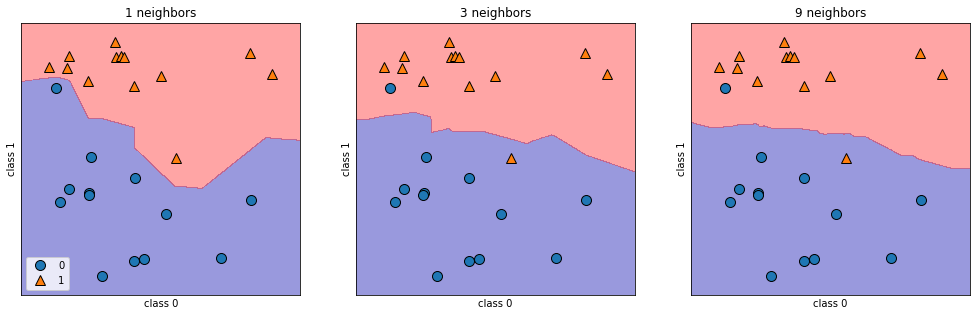

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("class 0")
    ax.set_ylabel("class 1")
axes[0].legend(loc=3)

## 1. 2. KNN Regression

#### 회귀에서의 KNN

test data의 feature값과 가장 가까운 값과 동일하게 $\hat y$을 예측한다.

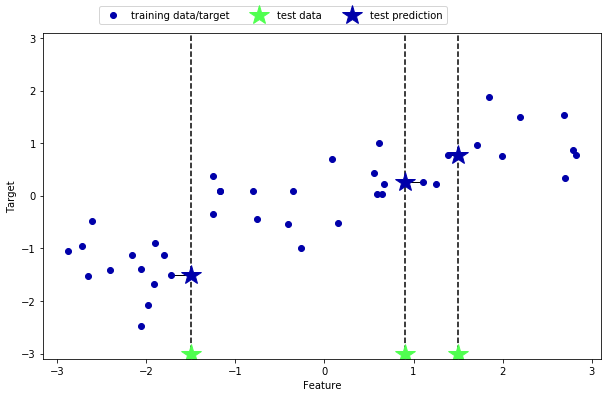

In [58]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

여러 개의 이웃을 사용할 경우에는 평균이 예측 된다.  

- weights 파라미터가 uniform 일 때는 np.mean(단순평균)
- weights 파라미터가 distance 일 때는 average(가중평균).

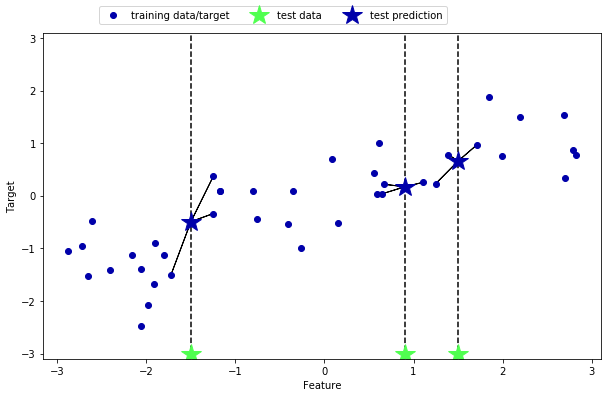

In [56]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

### 1. 2. 1. 데이터 생성 (wave 데이터셋)

In [68]:
X, y = mglearn.datasets.make_wave(n_samples=40)

### 1. 2. 2. 데이터셋 나누기

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 1. 2. 3. KNN 모델 객체 생성

In [75]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# weights 파라미터의 default는 uniform이다.

### 1. 2. 4. 모델 학습

In [72]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

### 1. 2. 5. Test 데이터 예측

In [73]:
model.predict(X_test)

array([-0.28506983,  0.25932073,  1.34209224, -2.46936184, -1.12263664,
       -1.67167334,  0.36023725,  0.88023319, -0.2060444 , -1.15798731])

### 1. 2. 6. $R^2$ 값 반환

In [74]:
model.score(X_test, y_test)

0.61815482903843932

## 1. 3. KNN 마무리

#### 특징

- 쉬운 모델, 모델링을 할 때 가볍게 시도할 수 있음
- train 데이터의 크기가 클 경우 predict할 때 시간이 많이 걸릴 수 있음
- 데이터를 scaling하는 전처리가 필요함
- feature가 많을 때는 적합하지 않음
- 0, null 값이 많은 데이터에는 잘 작동하지 않음

** 중요한 parameter
- metric : 데이터 포인트 사이의 거리를 재는 방법 (default : 유클리디안 거리)
- n_neighbors : 참조하는 이웃의 갯수

* * * *

# 2. OLS (Ordinary Least Square)

$ MSE = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n} (y_i - \hat y_i )^2$ 를 최소화 하는 $w$(가중치, 계수)와 $b$(절편)를 찾는 방식

* * * *

# 3. Logistic Regression & Linear Support Vector Machine (Linear SVM)

결정 경계를 선형 함수로 가지는 분류 모델
- 함수에서 계산한 값이 0.5보다 작으면 클래스를 0으로 예상
- 함수에서 계산한 값이 0.5보다 크면 클래스를 1로 예상

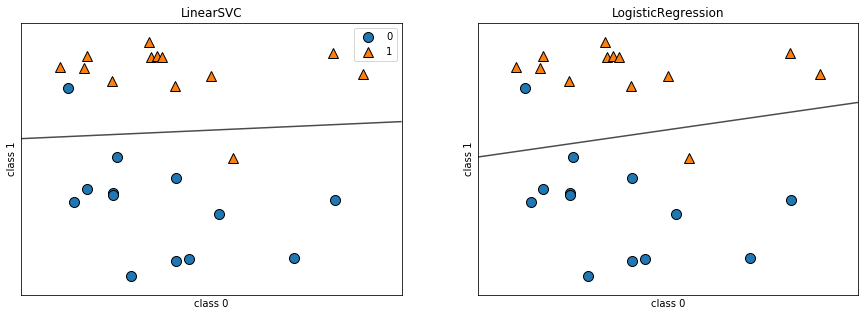

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    result = model.fit(X, y)
    mglearn.plots.plot_2d_separator(result, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(result.__class__.__name__))
    ax.set_xlabel("class 0")
    ax.set_ylabel("class 1")
axes[0].legend()

#### Regularization의 강도

regularization의 강도를 결정하는 C 값을 파라미터로 가지는데, 

- C가 낮아지면 현존하는 데이터셋을 가지고 모델을 Fit하게 되어 $w$가 0에 가까워지는 반면, 
- C가 높아지면 각각의 데이터 포인트를 정확히 분류하려고 하기 때문에, Train 데이터의 특성을 최대한 반영한다.

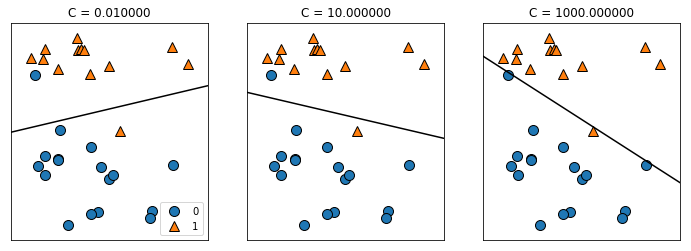

In [82]:
mglearn.plots.plot_linear_svc_regularization()

# 다중 클래스 분류 (OvR)

- 여러개의 이진 클래스 분류(Binary Class Classification) 문제로 변환
- OvR(One-vs.-Rest) 방법
    - 각 클래스에 해당하는지에 대한 여부를 이진 클래스 분류로 시행
    - 결과 값이 가장 높은 클래스를 선택.

In [107]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

In [108]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

model = OneVsRestClassifier(LinearSVC().fit(X, y))

In [109]:
model = model.fit(X, y)

In [113]:
model

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

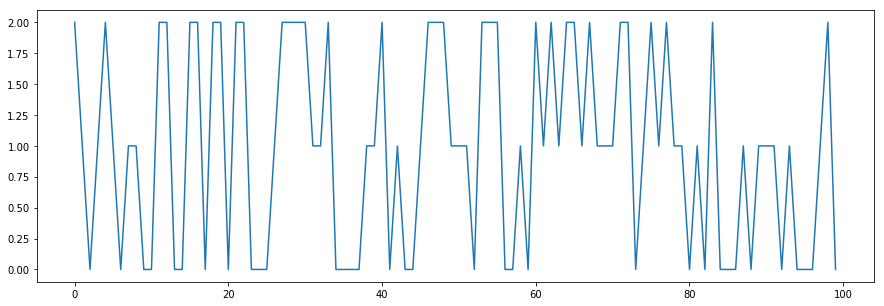

In [130]:
plt.figure(figsize=(15, 5))
plt.plot(pd.DataFrame(model.predict(X), columns=["prediction"]))
plt.show()

* * * *

# 4. Naive Bayes

- GaussianNB(가우시안 정규분포) : 연속적 데이터
- BernoulliNB(베르누이분포) : 이진 데이터
- MultinomailNB(다항분포) : 카운트 데이터